# Lab 2 - Data and clustering
## Part 1 - Data Manipulation
### Tutorial 01 - fill in missing data


In [ ]:
# tutorial 1 - filling in missing data
import numpy as np
import pandas as pd

df = pd.DataFrame([[np.nan, 2, np.nan, 0], [3,4,np.nan,1],[np.nan, np.nan, np.nan, 5],[np.nan, 3, np.nan, 4]], columns=list("ABCD"))

df.head(4)

,A,B,C,D
0,NaN,2.0,NaN,0
1,3.0,4.0,NaN,1
2,NaN,NaN,NaN,5
3,NaN,3.0,NaN,4


In [ ]:
# fill na with 0 (or anything you want)
filleddf = df.fillna(0)
filleddf


,A,B,C,D
0,0.0,2.0,0.0,0
1,3.0,4.0,0.0,1
2,0.0,0.0,0.0,5
3,0.0,3.0,0.0,4


In [ ]:
potatodf = df.fillna("potato")
potatodf

,A,B,C,D
0,potato,2.0,potato,0
1,3.0,4.0,potato,1
2,potato,potato,potato,5
3,potato,3.0,potato,4


In [ ]:
# set a value for each column
values = {"A":0, "B":1, "C":2, "D":3}
df_predefine = df.fillna(value = values)
df_predefine

,A,B,C,D
0,0.0,2.0,2.0,0
1,3.0,4.0,2.0,1
2,0.0,1.0,2.0,5
3,0.0,3.0,2.0,4


In [ ]:
# fill with mean
df_mean = df.fillna(df.mean())
df_mean
# the problem here is that because there are no values in C it replaces them all with  NaN - i.e. doesn't actually improve the data...

,A,B,C,D
0,3.0,2.0,NaN,0
1,3.0,4.0,NaN,1
2,3.0,3.0,NaN,5
3,3.0,3.0,NaN,4


### Task 01 - exercises to fill in missing data
- Practice filling in missing data on the two datasets generated below

In [ ]:
# this chunk is just to generate the datasets

import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_diabetes

rng = np.random.RandomState(42)
X_diabetes, y_diabetes = load_diabetes(return_X_y=True)
X_california, y_california = fetch_california_housing(return_X_y=True)
X_california = X_california[:400]
y_california = y_california[:400]

# this function adds missing values
def add_missing_values(X_full, y_full):
  n_samples, n_features = X_full.shape
  # Add missing values in 75% of the lines
  missing_rate = 0.75
  n_missing_samples = int(n_samples * missing_rate)
  missing_samples = np.zeros(n_samples, dtype=bool)
  missing_samples[: n_missing_samples] = True
  rng.shuffle(missing_samples)
  missing_features = rng.randint(0, n_features, n_missing_samples)
  X_missing = X_full.copy()
  X_missing[missing_samples, missing_features] = np.nan
  y_missing = y_full.copy()
  return X_missing, y_missing

# calling the missing values function on our california and diabetes datasets
X_miss_california, y_miss_california = add_missing_values(
 X_california, y_california)
X_miss_diabetes, y_miss_diabetes = add_missing_values(
 X_diabetes, y_diabetes)

import pandas as pd
diabetes_pddata = pd.DataFrame(data= X_miss_diabetes)
diabetes_pddata['target'] = pd.Series(y_miss_diabetes)
print("diabetes")
print(diabetes_pddata.head(5))

california_pddata = pd.DataFrame(data = X_miss_california)
california_pddata["target"] = pd.Series(y_miss_california)
print("california")
print(california_pddata.head(5))

diabetes
          0         1         2         3         4         5         6  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474       NaN -0.008449 -0.019163  0.074412   
2       NaN  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595       NaN  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596       NaN   

          7         8         9  target  
0 -0.002592  0.019907       NaN   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  
california
        0     1         2        3      4         5      6       7  target
0  8.3252  41.0  6.984127  1.02381  322.0  2.555556  37.88     NaN   4.526
1  8.3014  21.0  6.238137  0.97188    NaN  2.109842  37.86 -122.22   3.585
2  7.2574  52.0  8.288136      NaN  496.0  2.802260 

In [ ]:
# fillna with blanks
filled_diabetes = diabetes_pddata.fillna(0)

filled_diabetes.head(5)

,0,1,2,3,4,5,6,7,8,9,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,0.000000,151.0
1,-0.001882,-0.044642,-0.051474,0.000000,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.000000,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,0.000000,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.000000,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
# fill using sklearn functions
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values = np.nan, strategy = "mean")

imp_mean.fit([[7,2,3],[4,np.nan,6],[10,5,9]])

X = [[np.nan, 2, 3],[4, np.nan, 6], [10,np.nan, 9]]

X_filled = imp_mean.transform(X)

print(X)
print(X_filled)

[[nan, 2, 3], [4, nan, 6], [10, nan, 9]]
[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


In [ ]:
# fill with means

mean_california = california_pddata.fillna(california_pddata.mean())

print(california_pddata.mean()) # the mean function gives an array - this matches the structure for filling with set values

mean_california.head(5)

0           3.111194
1          43.502793
2           4.956863
3           1.068948
4         966.684814
5           2.773224
6          37.797896
7        -122.221212
target      1.709918
dtype: float64


,0,1,2,3,4,5,6,7,target
0,8.3252,41.0,6.984127,1.023810,322.000000,2.555556,37.88,-122.221212,4.526
1,8.3014,21.0,6.238137,0.971880,966.684814,2.109842,37.86,-122.220000,3.585
2,7.2574,52.0,8.288136,1.068948,496.000000,2.802260,37.85,-122.240000,3.521
3,5.6431,52.0,5.817352,1.068948,558.000000,2.547945,37.85,-122.250000,3.413
4,3.8462,52.0,6.281853,1.068948,565.000000,2.181467,37.85,-122.250000,3.422


In [ ]:
# fill with pre-set values

values = {0:1, 1:1, 2:500, 3:7, 4:18, 5:23, 6:"potato", 7:9000, 7: "toad"}

diabetes_values = diabetes_pddata.fillna(value = values)

diabetes_values.head(5)

,0,1,2,3,4,5,6,7,8,9,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,NaN,151.0
1,-0.001882,-0.044642,-0.051474,7.000000,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,1.000000,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,7.000000,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,potato,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
# use the sklearn functions

imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")

# I got an error about column names being a mixture orf int and string so i will convert these...
california_pddata.columns = california_pddata.columns.astype(str)
imp_mean.fit(california_pddata)

california_sk_filled = imp_mean.transform(california_pddata)

cali_sk_df = pd.DataFrame(california_sk_filled)

cali_sk_df.head(10)

,0,1,2,3,4,5,6,7,8
0,8.3252,41.0,6.984127,1.023810,322.000000,2.555556,37.880000,-122.221212,4.526
1,8.3014,21.0,6.238137,0.971880,966.684814,2.109842,37.860000,-122.220000,3.585
2,7.2574,52.0,8.288136,1.068948,496.000000,2.802260,37.850000,-122.240000,3.521
3,5.6431,52.0,5.817352,1.068948,558.000000,2.547945,37.850000,-122.250000,3.413
4,3.8462,52.0,6.281853,1.068948,565.000000,2.181467,37.850000,-122.250000,3.422
5,4.0368,52.0,4.761658,1.103627,966.684814,2.139896,37.850000,-122.250000,2.697
6,3.6591,52.0,4.931907,0.951362,1094.000000,2.128405,37.840000,-122.250000,2.992
7,3.1200,52.0,4.797527,1.061824,1157.000000,1.788253,37.797896,-122.250000,2.414
8,2.0804,42.0,4.294118,1.068948,1206.000000,2.026891,37.840000,-122.260000,2.267
9,3.6912,52.0,4.970588,0.990196,1551.000000,2.773224,37.840000,-122.250000,2.611


### Tutorial 02. Data pre-processing
- many algorithms have assumptions about the data - e.g. that it is centred around zero, that variance is in the same order, that categorical features are encoded in a standard way etc

In [ ]:
# normalisation based on mean and sd
from sklearn import preprocessing
import numpy as np

X_train = np.array([[1,-1,2],[2,0,0],[0,1,-1]])
scaler = preprocessing.StandardScaler().fit(X_train)

vector_unnorm = np.array([[0.3,0.5,3]]) # i changed the format of this so it was one column with three values rather than three columns with one value

scaler.transform(vector_unnorm) # ok, gonna assume this is right

array([[-0.85732141,  0.61237244,  2.13808994]])

In [ ]:
# minmiax standardisation to normalise data in range [0,1]

from sklearn.preprocessing import MinMaxScaler

data = [[-1,2],[-0.5,6],[0,10],[1,18]]

scaler = MinMaxScaler()

scaler.fit(data)

print(scaler.data_max_)

print(scaler.transform(data))

[ 1. 18.]
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


### Tutorial 03. distance metrics
- [Detail on sklearn distance metrics](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.DistanceMetric.html?highlight=distancemetric#)

In [ ]:
# euclidian distance
from sklearn.metrics import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')

X = [[1,2],[0,2],[3,5]]


Y = [[0,0]]


print(dist.pairwise(X,Y))

print(dist.pairwise(X))

# when we run this on one sample it gives us a matrix expressing difference between each sample in the list
# if we have three samples (as we do here) then we get a comparison of 1,1, then 1,2 then 1,3 then
# on the next row 2,1, 2,2, 2,3 etc
# so it's symmetric and also the diagonal row comparins like to like will always be 0

[[2.23606798]
 [2.        ]
 [5.83095189]]
[[0.         1.         3.60555128]
 [1.         0.         4.24264069]
 [3.60555128 4.24264069 0.        ]]


### Task 02 - distances and standardisation

In [ ]:
# create dataset

import numpy as np
from sklearn.datasets import load_diabetes

X_diabetes, y_diabetes = load_diabetes(return_X_y=True)

In [ ]:
# calculate pairwise distance between 1st, 10th, 20th, 50th and 100th samples
# prepare the samples
df = pd.DataFrame(X_diabetes)
diabetes_samples = [X_diabetes[0],X_diabetes[9],X_diabetes[19],X_diabetes[49],X_diabetes[99]]
print(diabetes_samples) # looks a bit weird as it has made an array of arrays....


[array([ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613]), array([-0.07090025, -0.04464164,  0.03906215, -0.03321323, -0.01257658,
       -0.03450761, -0.02499266, -0.00259226,  0.06773705, -0.01350402]), array([-0.02730979, -0.04464164, -0.01806189, -0.04009893, -0.00294491,
       -0.01133463,  0.03759519, -0.03949338, -0.0089434 , -0.05492509]), array([-0.04183994,  0.05068012,  0.01427248, -0.00567042, -0.01257658,
        0.00620169, -0.07285395,  0.07120998,  0.0354587 , -0.01350402]), array([-0.00188202, -0.04464164, -0.06440781,  0.01154383,  0.02732605,
        0.03751653, -0.01394774,  0.03430886,  0.01178548, -0.05492509])]


In [ ]:
# start with euclidian
dist_euclid = DistanceMetric.get_metric("euclidean")
print(dist_euclid.pairwise(diabetes_samples))

[[0.         0.16779176 0.1896391  0.13657152 0.20181343]
 [0.16779176 0.         0.13680271 0.14744655 0.17487826]
 [0.1896391  0.13680271 0.         0.20017488 0.13151954]
 [0.13657152 0.14744655 0.20017488 0.         0.16386088]
 [0.20181343 0.17487826 0.13151954 0.16386088 0.        ]]


In [ ]:
# then manhattan
dist_manhattan = DistanceMetric.get_metric("manhattan")
print(dist_manhattan.pairwise(diabetes_samples))

[[0.         0.3843575  0.55122858 0.35050042 0.52735427]
 [0.3843575  0.         0.35799534 0.37136573 0.4744907 ]
 [0.55122858 0.35799534 0.         0.51075843 0.34861263]
 [0.35050042 0.37136573 0.51075843 0.         0.46329331]
 [0.52735427 0.4744907  0.34861263 0.46329331 0.        ]]


In [ ]:
# then chebyshev
dist_cheby = DistanceMetric.get_metric("chebyshev")
print(dist_cheby.pairwise(diabetes_samples))

[[0.         0.10897615 0.09532176 0.07991585 0.12610401]
 [0.10897615 0.         0.07668045 0.09532176 0.10346996]
 [0.09532176 0.07668045 0.         0.11070336 0.07380224]
 [0.07991585 0.09532176 0.11070336 0.         0.09532176]
 [0.12610401 0.10346996 0.07380224 0.09532176 0.        ]]


In [ ]:
# normalise data
# let's try the minmax standardisation
scaler = MinMaxScaler()
scaler.fit(X_diabetes)
scaled_diabetes = scaler.transform(X_diabetes)
print(scaled_diabetes)

[[0.66666667 1.         0.58264463 ... 0.28208745 0.562217   0.43939394]
 [0.48333333 0.         0.14876033 ... 0.14104372 0.22243673 0.16666667]
 [0.88333333 1.         0.51652893 ... 0.28208745 0.49657763 0.40909091]
 ...
 [0.68333333 1.         0.28512397 ... 0.24964739 0.30503001 0.56060606]
 [0.28333333 0.         0.49586777 ... 0.39351199 0.65702552 0.40909091]
 [0.28333333 0.         0.0661157  ... 0.14104372 0.46930394 0.51515152]]


In [ ]:
# then sample the new data
diabetes_scaled_samples = [scaled_diabetes[0],scaled_diabetes[9],scaled_diabetes[19],scaled_diabetes[49],scaled_diabetes[99]]
print(diabetes_scaled_samples)

[array([0.66666667, 1.        , 0.58264463, 0.54929577, 0.29411765,
       0.25697211, 0.20779221, 0.28208745, 0.562217  , 0.43939394]), array([0.16666667, 0.        , 0.49586777, 0.32394366, 0.40686275,
       0.25796813, 0.27272727, 0.28208745, 0.74639334, 0.45454545]), array([0.36666667, 0.        , 0.2768595 , 0.29577465, 0.44117647,
       0.33167331, 0.49350649, 0.14104372, 0.45112149, 0.3030303 ]), array([0.3       , 1.        , 0.40082645, 0.43661972, 0.40686275,
       0.3874502 , 0.1038961 , 0.56417489, 0.62209976, 0.45454545]), array([0.48333333, 0.        , 0.09917355, 0.50704225, 0.54901961,
       0.48705179, 0.31168831, 0.42313117, 0.53094177, 0.3030303 ])]


In [ ]:
# euclidian - scaled
dist_euclid = DistanceMetric.get_metric("euclidean")
print(dist_euclid.pairwise(diabetes_scaled_samples))

[[0.         1.16593023 1.18635884 0.55146842 1.19888003]
 [1.16593023 0.         0.52359059 1.08618521 0.67427338]
 [1.18635884 0.52359059 0.         1.19455629 0.49456292]
 [0.55146842 1.08618521 1.19455629 0.         1.11983549]
 [1.19888003 0.67427338 0.49456292 1.11983549 0.        ]]


In [ ]:
# then manhattan -scaled
dist_manhattan = DistanceMetric.get_metric("manhattan")
print(dist_manhattan.pairwise(diabetes_scaled_samples))

[[0.         2.19013302 2.75528343 1.36540192 2.60661826]
 [2.19013302 0.         1.36380614 2.04574499 1.81467149]
 [2.75528343 1.36380614 0.         2.55680428 1.31256776]
 [1.36540192 2.04574499 2.55680428 0.         2.38867629]
 [2.60661826 1.81467149 1.31256776 2.38867629 0.        ]]


In [ ]:
# then chebyshev - scaled
dist_cheby = DistanceMetric.get_metric("chebyshev")
print(dist_cheby.pairwise(diabetes_scaled_samples))

[[0.         1.         1.         0.36666667 1.        ]
 [1.         0.         0.29527186 1.         0.39669421]
 [1.         0.29527186 0.         1.         0.28208745]
 [0.36666667 1.         1.         0.         1.        ]
 [1.         0.39669421 0.28208745 1.         0.        ]]


### Tutorial 04. Matplotlib basics

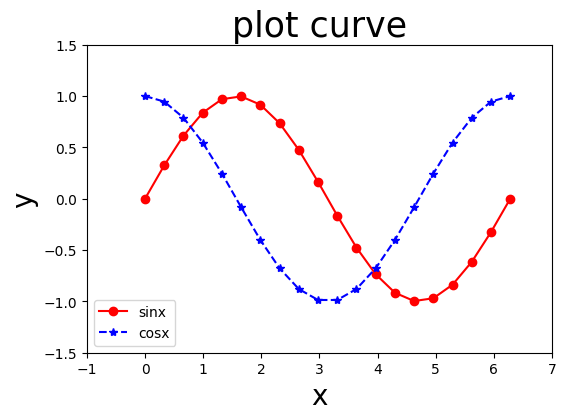

In [ ]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# In order to display graphs in the jupyter notebook inline pages, you can turn on the following switch
# If the switch is not turned on, you will have to use the function: plt.show() each time the graph is displayed
%matplotlib inline
x = np.linspace(0, 2 * np.pi, 20)
plt.figure(figsize=(6, 4))# create a new image and set the image size
plt.plot(x, np.sin(x), 'ro-', label='sinx')# set colour, marker symbol, line type, legend label
plt.plot(x, np.cos(x), 'b*--', label='cosx')
plt.title('plot curve', fontsize=25)# title
plt.xlim(-1, 7)# x-axis range
plt.ylim(-1.5, 1.5)# y-axis range
plt.xlabel('x', fontsize=20)# x-axis label
plt.ylabel('y', fontsize=20)# y-axis label
plt.legend(loc='best')# legend
plt.show()

- in matplotlib a Figure object is a whole image
- there can be one or more axes with the figure
- an axes is a plotting area with it's coordinate system
- matplotlib has two ways of drawing plots
  - pyplot - simple and suitable when not using subplots
  - axes - used when we need subplots

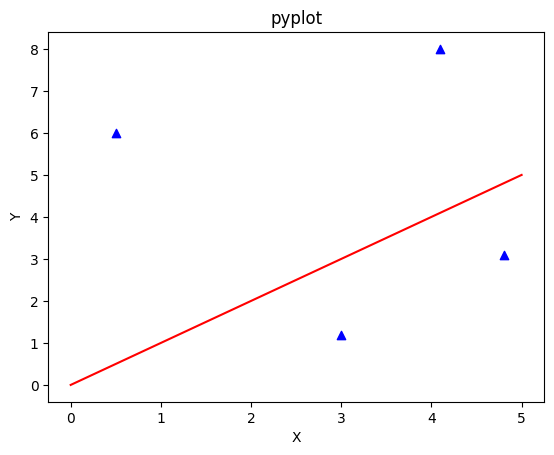

In [ ]:
# pyplot graphing
plt.figure()
plt.plot(np.arange(6), np.arange(6), color='r')
plt.scatter([0.5, 4.1, 4.8, 3], [6, 8, 3.1, 1.2], color='b',
marker='^')
plt.title('pyplot')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

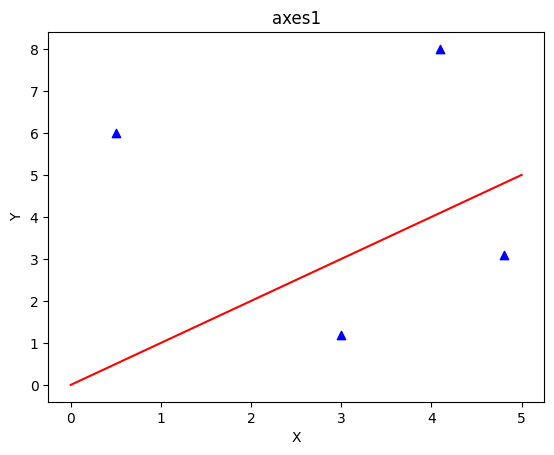

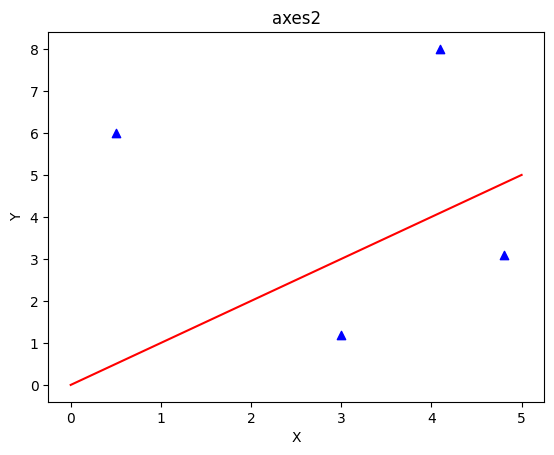

In [ ]:
# axes drawing I
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.arange(6), np.arange(6), color='r')
ax.scatter([0.5, 4.1, 4.8, 3], [6, 8, 3.1, 1.2], color='b',
marker='^')
ax.set_title('axes1')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()
# axes drawing II
fig, ax = plt.subplots()
ax.plot(np.arange(6), np.arange(6), color='r')
ax.scatter([0.5, 4.1, 4.8, 3], [6, 8, 3.1, 1.2], color='b',
marker='^')
ax.set_title('axes2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()

- we can draw subplots with the pyplot method or the axes method

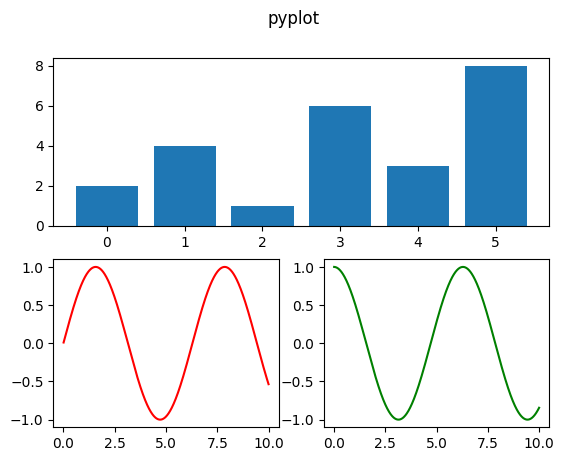

In [ ]:
# pyplot
plt.figure()
X = np.arange(0.01, 10, 0.01)
# Divided into 2*2, occupying the 1st subplots
plt.subplot(2,2,3)
plt.plot(X, np.sin(X), 'r-')
# Divided into 2*2, occupying the 2nd subplots
plt.subplot(2,2,4)
plt.plot(X, np.cos(X), 'g-')
# Divided into 2*1, occupying the 2nd subplot (i.e. occupying the 2*2 3rd and 4th subplots)
plt.subplot(2,2,(1,2))
plt.bar(np.arange(6), np.array([2, 4, 1, 6, 3, 8]))
plt.suptitle('pyplot')
plt.show()

# i have tried to get my head round this but I@m v consued about how the long chart works...
# according to the docs you can split these up with commas
# the first value is number of rows
# the second value is number of columns
# the third value is the position index
# if we include a tuple in the position index, that indicates the start and end location of the chart
# this is how we make it span multiple boxes
# I think this is clearer than the example code which was b oggling my mind

# (also I'm confused as thought we didn't use pyplot for subplots.....)

In [ ]:
# we can also do this using axes method

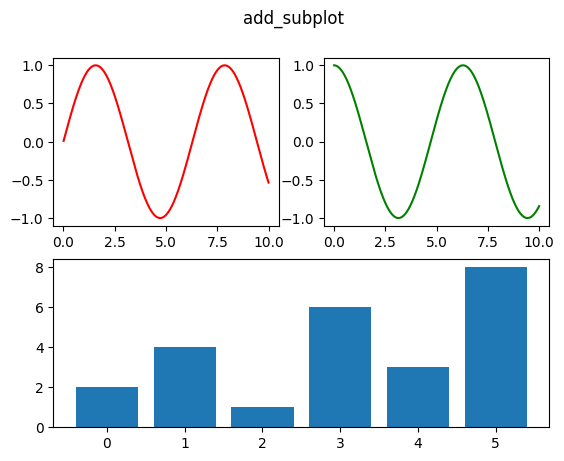

In [ ]:
# axes way one: add_subplot
# Same parameters as plt.subplot
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(X, np.sin(X), 'r-')
ax2 = fig.add_subplot(222)
ax2.plot(X, np.cos(X), 'g-')
ax3 = fig.add_subplot(212) # still can't work out wht this is doing what it's doing - but see alternate method above
ax3.bar(np.arange(6), np.array([2, 4, 1, 6, 3, 8]))
fig.suptitle('add_subplot')
plt.show()


In [ ]:
# we can also export these graphics
# plt.figure()
# plt.plot(np.arange(6))
# # pdf
# plt.savefig('./filename.pdf',format='pdf')
# # svg
# plt.savefig('./filename.svg',format='svg')
# # not run this tho

### Tutorial 05. Visualisation examples
- seaborn requires df or np array
- drawing function generally takes the following form:
```
sns.plotName(x='X-axis column name', y='Y-axis column name', data=original data df object)
sns.plotName(x='X-axis column name', y='Y-axis column name', hue='group plotting parameters',
data=original data df object)
sns.plotname(x=np.array, y=np.array[, ...])
```
- seaborn has predefined themes (uses `darkgrid` as default)
```
 darkgrid, whitegrid, dark, white, ticks
```
- and predefined 'contexts' which are basically sizes? the default is notebook
```
paper, notebook, talk, poster
```
- the colour palettes are
```
muted, RdBu, Blues_d, Set1, etc.
```
- we use `sns.set` to define all this

In [ ]:
# load data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Loading data
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')
tips = sns.load_dataset('tips')
iris.head()
titanic.head()
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 1) Line graphs

<Axes: >

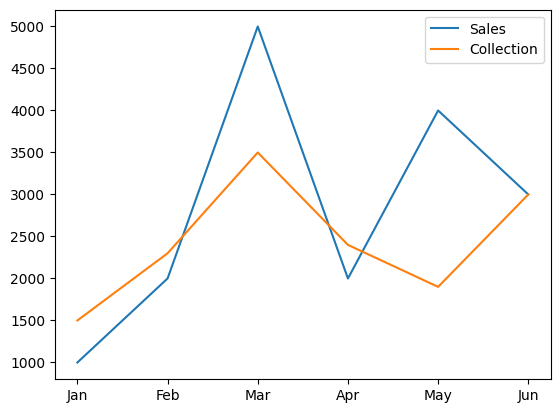

In [ ]:
# line - pandas
test_dict = {'Sales':[1000,2000,5000,2000,4000,3000],'Collection':[1500,2300,3500,2400,
1900,3000]}
line = pd.DataFrame(test_dict,index=['Jan', 'Feb', 'Mar', 'Apr', 'May','Jun'])
line.plot()


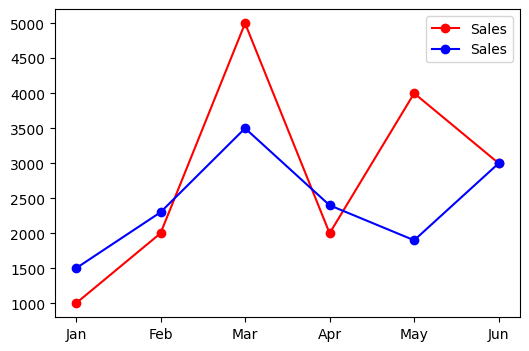

In [ ]:
# line - matplotlib
# matplotlib
plt.figure(figsize=(6, 4))# create a new image and set the image size
index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
plt.plot(index, test_dict['Sales'], 'ro-', label='Sales')# set colour, marker symbol, line type, legend label
plt.plot(index, test_dict['Collection'], 'bo-', label='Sales')
plt.legend(loc='best')# legend
plt.show()

<Axes: xlabel='date', ylabel='Sales'>

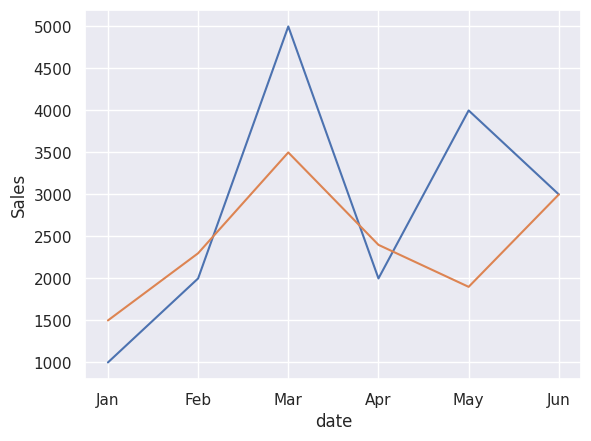

In [ ]:
# line seaborn
d = {'Sales':test_dict['Sales'],
'Collection':test_dict['Collection'],'date': index}
line=pd.DataFrame(d)
sns.set(style='darkgrid')
sns.lineplot(x="date",y='Sales',data=line)
sns.lineplot(x="date",y='Collection',data=line)

#### 2) Scatter charts

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

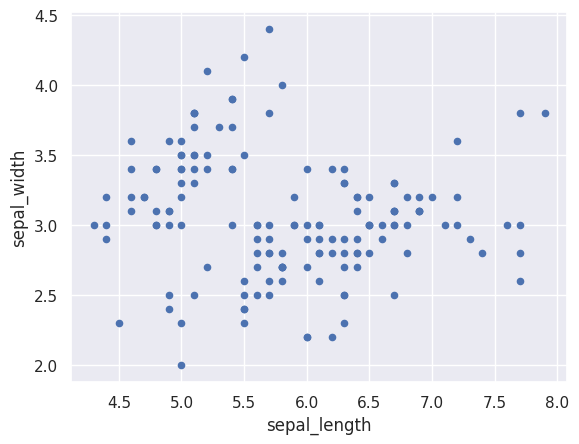

In [ ]:
# scatter - pandas
iris.plot(x='sepal_length', y='sepal_width', kind='scatter')

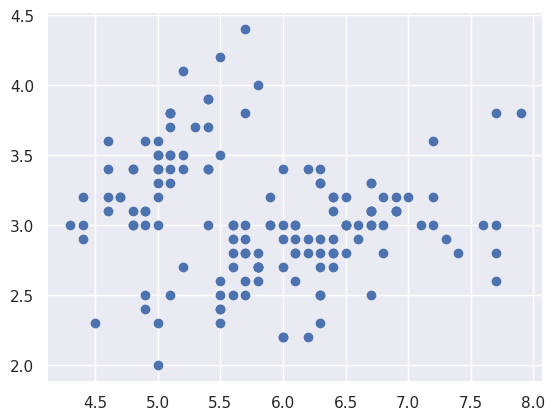

In [ ]:
# scatter - matplotlib
plt.scatter(iris['sepal_length'], iris['sepal_width'])

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

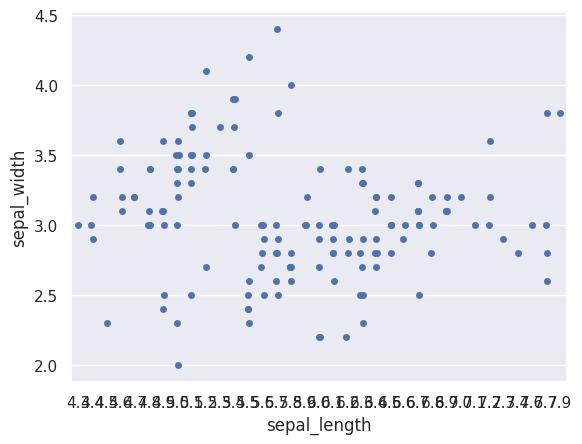

In [ ]:
#seaborn--Common Scatter Plot
sns.stripplot(x="sepal_length",y="sepal_width", data=iris)

<Axes: ylabel='sepal_width'>

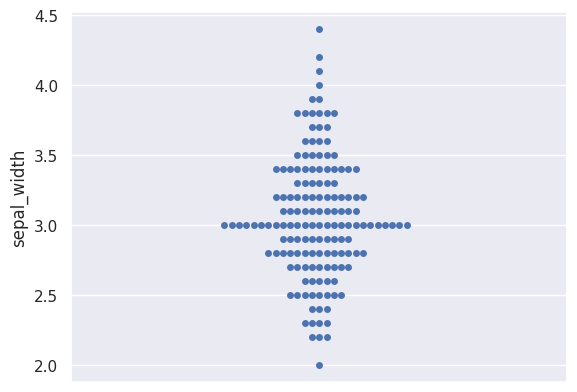

In [ ]:
#seaborn--A scatter plot of the distribution density can be seen
sns.swarmplot(y="sepal_width", data=iris) # well that's pretty

#### 3) Bar charts

<Axes: >

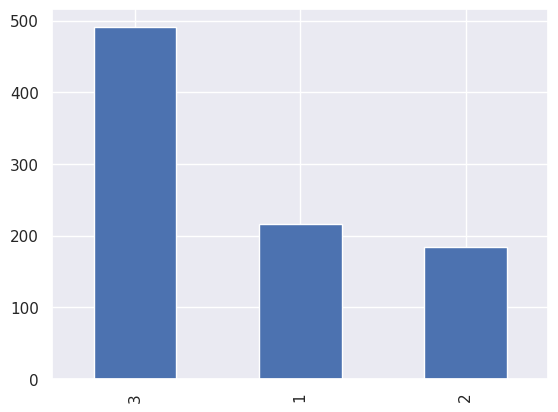

In [ ]:
# bar plot - pandas
titanic.pclass.value_counts().plot(kind='bar')
# pclass is a column in the dataset - I guess passenger class

<BarContainer object of 8 artists>

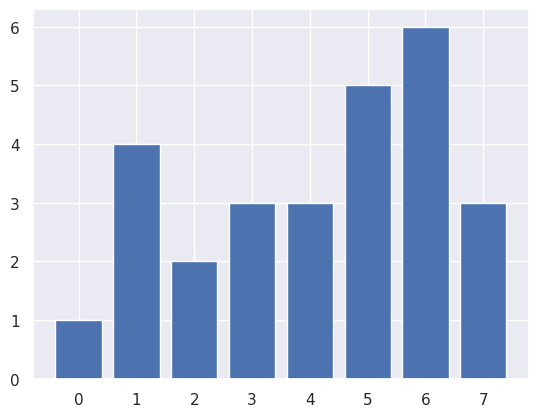

In [ ]:
#bar plot - matplotlib
plt.bar(np.arange(8), np.array([1, 4, 2, 3, 3, 5, 6, 3]))

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


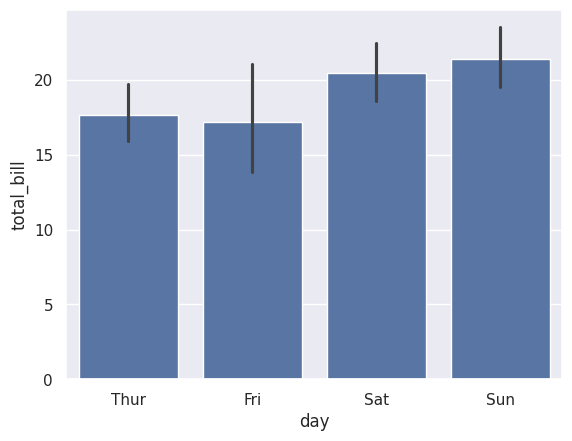

In [ ]:
# Statistical function for barplot, default is the mean of the variable estimator=np.mean
sns.barplot(x='day', y='total_bill', data=tips) # so we can add a third variable, in this case tips
# and it shows a line with the mean of the tips for that category

print(tips)

<Axes: xlabel='day', ylabel='total_bill'>

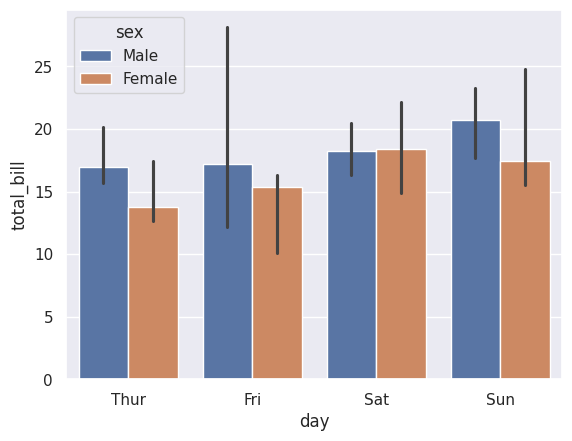

In [ ]:
# Plot a bar graph of the median of the variables, with estimator specifying the statistical function
sns.barplot(x='day', y='total_bill', hue='sex', data=tips, estimator=
np.median)

#### 4) Histograms

<Axes: ylabel='Frequency'>

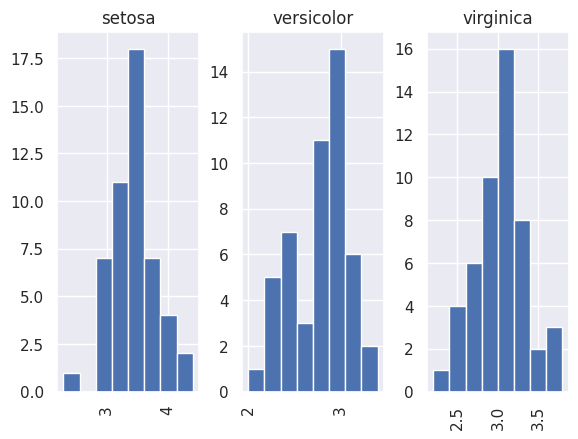

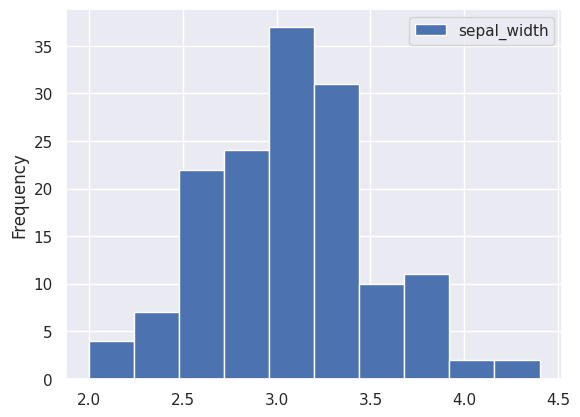

In [ ]:
# histogram - Pandas
iris.hist('sepal_width', by='species',layout=(1,3), bins=8)
iris.plot(y='sepal_width', kind='hist')

(array([ 4.,  7., 22., 24., 37., 31., 10., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

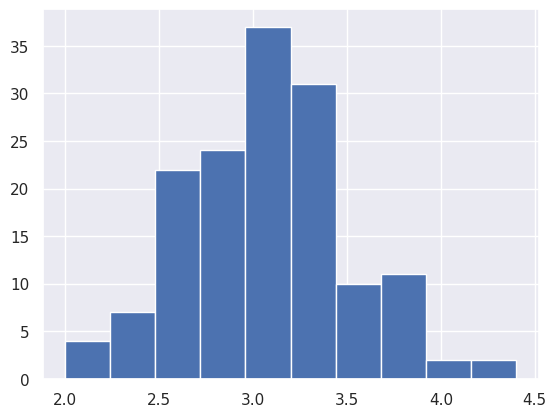

In [ ]:
#histogram - matplotlib
plt.hist(iris['sepal_width'])# If parameter density=True is set, the probability density value is calculated

(array([0.11111111, 0.19444444, 0.61111111, 0.66666667, 1.02777778,
        0.86111111, 0.27777778, 0.30555556, 0.05555556, 0.05555556]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <BarContainer object of 10 artists>)

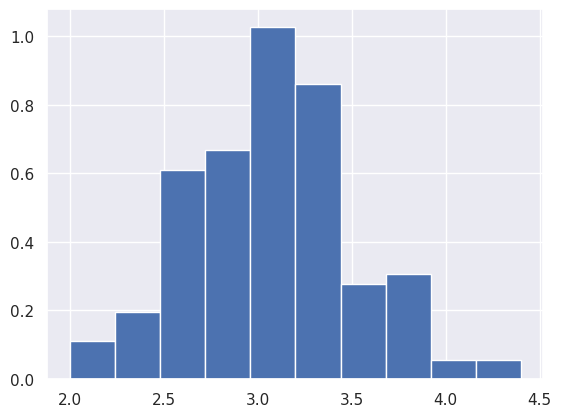

In [ ]:
# histogram - matplotlib
plt.hist(iris['sepal_width'], density=True)# If parameter density=True is set, the probability density value is calculated

<Axes: xlabel='sepal_width', ylabel='Count'>

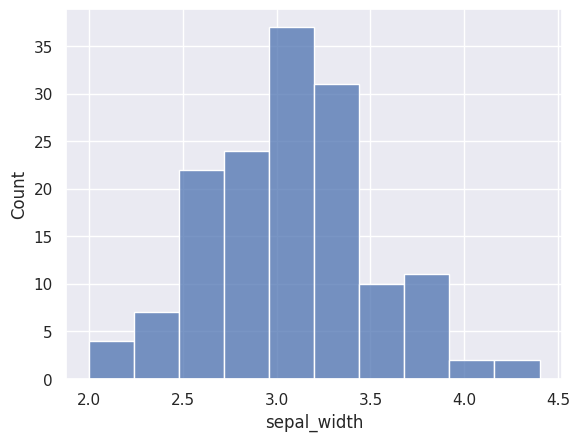

In [ ]:
# histogram - seaborn
sns.histplot(x=iris['sepal_width'],bins=10)

#### 5) Pairplot

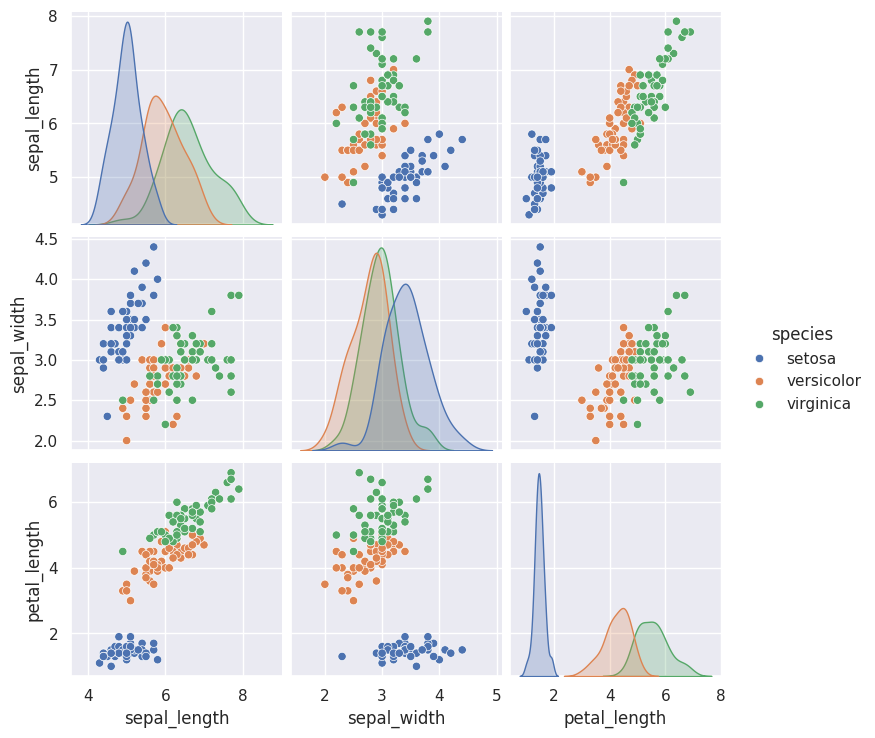

In [ ]:
# pairplot plots (idek what these are so will be interesting to see) - seaborn
sns.pairplot(iris, vars=['sepal_length', 'sepal_width', 'petal_length'],
hue="species")
# i see, it's a nice matrix of features compared - v helpful!

#### 6) Parallel co-ordinates

<Axes: >

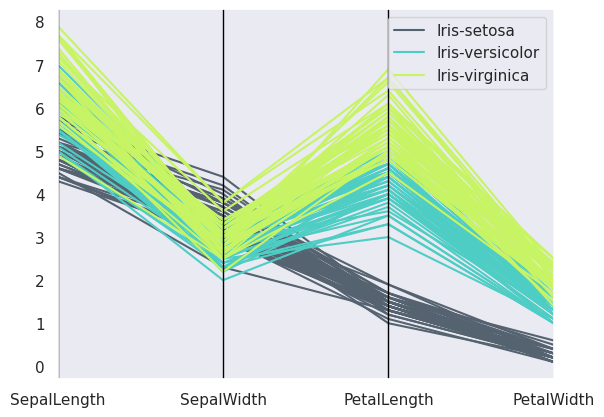

In [ ]:
# parallel coordinates - pandas
import pandas as pd
df = pd.read_csv(
'https://raw.github.com/pandas-dev/'
'pandas/main/pandas/tests/io/data/csv/iris.csv'
)
pd.plotting.parallel_coordinates(
df, 'Name', color=('#556270', '#4ECDC4', '#C7F464')
)

### Task 03. `parallel_coordinates` visualisation

More info on the [`parallel_coordinates`](https://pandas.pydata.org/docs/reference/api/pandas.plotting.parallel_coordinates.html) function

In [ ]:
# load data
from sklearn import datasets
wine = datasets.load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = pd.DataFrame(wine.target)

display(df)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


[Text(0, 0, 'alcohol'),
 Text(1, 0, 'malic_acid'),
 Text(2, 0, 'ash'),
 Text(3, 0, 'alcalinity_of_ash'),
 Text(4, 0, 'magnesium'),
 Text(5, 0, 'total_phenols'),
 Text(6, 0, 'flavanoids'),
 Text(7, 0, 'nonflavanoid_phenols'),
 Text(8, 0, 'proanthocyanins'),
 Text(9, 0, 'color_intensity'),
 Text(10, 0, 'hue'),
 Text(11, 0, 'od280/od315_of_diluted_wines'),
 Text(12, 0, 'proline')]

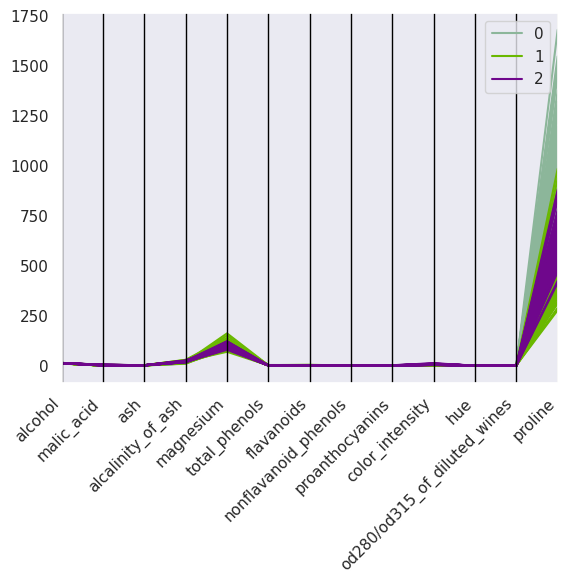

In [ ]:
ax = pd.plotting.parallel_coordinates(df, "target")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


,magnesium,color_intensity,proline,target
0,127.0,5.64,1065.0,0
1,100.0,4.38,1050.0,0
2,101.0,5.68,1185.0,0
3,113.0,7.80,1480.0,0
4,118.0,4.32,735.0,0
...,...,...,...,...
173,95.0,7.70,740.0,2
174,102.0,7.30,750.0,2
175,120.0,10.20,835.0,2
176,120.0,9.30,840.0,2


[Text(0, 0, 'magnesium'), Text(1, 0, 'color_intensity'), Text(2, 0, 'proline')]

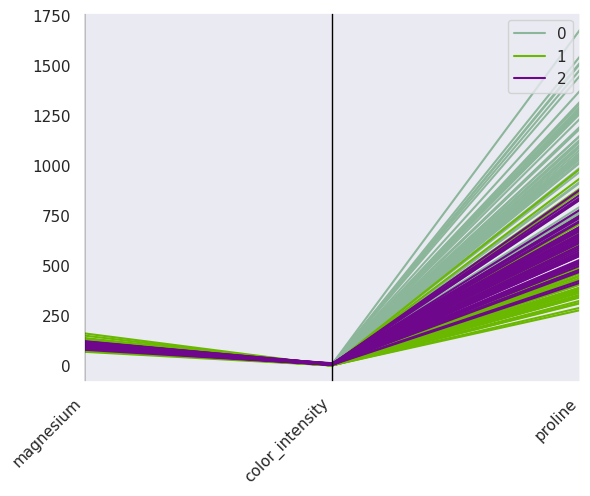

In [ ]:

# so looks to me like the interesting features are magnesium, color_intensity and proline
# so can we look at just those?

wine_selected = df[["magnesium","color_intensity","proline","target"]]

display(wine_selected)

ax = pd.plotting.parallel_coordinates(wine_selected, "target")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


### Tutorial 06. Cross-validation: evaluating estimator performance
#### 1) K-Folds cross-validator

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array(["a", "b", "c", "d"])
kf = KFold(n_splits=4) # this is the number of splits
kf.get_n_splits(X)
print(kf)
print(kf.split(X))
for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=4, random_state=None, shuffle=False)
<generator object _BaseKFold.split at 0x792613642ea0>
TRAIN: [1 2 3] TEST: [0]
TRAIN: [0 2 3] TEST: [1]
TRAIN: [0 1 3] TEST: [2]
TRAIN: [0 1 2] TEST: [3]


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
X = ["a", "b", "c", "d"]
kf = KFold(n_splits=2)
for train, test in kf.split(X):
  print("%s %s" % (train, test))

[2 3] [0 1]
[0 1] [2 3]


#### 2) Cross-validation: evaluating estimator performance
- learning and testing on the same data is a methodological mistake - overfitting
- So we hold some data out for testing
- `sklearn` gives us some handy functions to help with this

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape # 150 rows of datab

((150, 4), (150,))

In [ ]:
# lets grab a sample for training and hold some back for evaluating
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.4, random_state=0) # save 40% for testing
X_train.shape, y_train.shape
X_test.shape, y_test.shape
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test) # 97% accurate - p good!

0.9666666666666667

- we can use the `cross_val_score` helper function on the estimator and the dataset as a simple way of implementing cross-validation

In [ ]:
# this example trains on the iris data with 5 cross-validation splits, training and testing across 5 round
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [ ]:
# and we can retrieve mean and SD of the different validation results
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(),
scores.std()))

0.98 accuracy with a standard deviation of 0.02


In [ ]:
# by default the function uses the score method of the estimator
# (not exactly sure what this is? but guess each algorithm has it's own evaluation score)
# but we can also specify

from sklearn import metrics
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
# from notes "The F1 score is the harmonic mean of precision and recall for evaluating classification methods"
scores

array([0.96658312, 1.        , 0.96658312, 0.96658312, 1.        ])

### Task 04. K-folds cross experiment
- logistic regression classifier on breast cancer data - binary classification task
- use a K-fold to evaluate

In [ ]:
# load the dataset
from sklearn.datasets import load_breast_cancer
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
X, y = load_breast_cancer(return_X_y=True)

In [ ]:
# train the model
lr=LogisticRegression(solver='lbfgs', max_iter=8000) # create a regressor

scores = cross_val_score(lr, X, y, cv=5)

print(scores)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(),
scores.std()))



[0.93859649 0.94736842 0.98245614 0.92982456 0.95575221]
0.95 accuracy with a standard deviation of 0.02


## Part 2. Clustering
### Tutorial 07. Clustering model evaluation
- how do we objectively assess how good a clustering model is, particularly when visualisation is not sufficient
- metrics are provided by the `metrics` module in `sklearn`
  - purity score - requires ground-truth, best value = 1, self-defined
  - silhouette scores - ground-truth not required, best value = 1, `sklearn` function = `silhouette_score`
#### 1) self-defined purity score function

In [ ]:
import numpy as np
from sklearn import metrics
def purity_score(y_true, y_pred):
  # compute contingency matrix (also called confusion matrix)
  contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
  # return purity
  return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

# ok but there's no example on how to actually use this... (although seems fairly self-explanatory)

#### 2) Silhouette scores

In [ ]:
# remember silhouette is a measure of how similar to its own cluster each opint is compared to other clusters

# from sklearn import metrics
# silhouetteScore=metrics.silhouette_score(X, y_pred, metric='euclidean',
# sample_size=None, random_state=None)

# this example doesn't actually work as we don't have any 'y_pred' data lol
# hopefully it's in the task if not I will need to come back and test some of this
# currently a bit tired tho

# ok there is an example just below after the k-means clustering

### Tutorial 08. k-means clustering algorithm

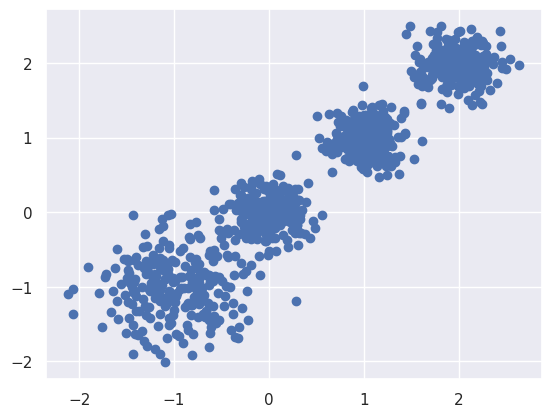

In [ ]:
# generate the experimental data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
# X is the sample feature, Y is the sample cluster category, 1000 samples, 2 features
# per sample, 4 clusters, cluster centres in [-1,-1], [0,0], [1,1], [2,2], cluster
# variances [0.4, 0.2, 0.2, 0.2] respectively
X, y = make_blobs(n_samples=1000, n_features=2, centers=[[-1,-1], [0,0], [1,1],
[2,2]], cluster_std=[0.4, 0.2, 0.2, 0.2],
random_state =9)
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

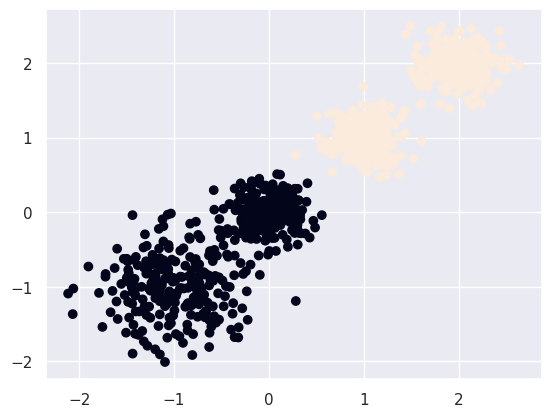

In [ ]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=2, random_state=9).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

In [ ]:
# ok now lets try silhouette?
from sklearn import metrics
silhouetteScore=metrics.silhouette_score(X, y_pred, metric='euclidean',
sample_size=None, random_state=None)
print(silhouetteScore)

0.6435178953651656


### Tutorial 09. Agglomerative Clustering
- this is an unsupervised learning method
#### 1) call it and compare to ground truth

Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 1
 1 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 1 1 2 2 1 1 1
 2 1]
Ground truth: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


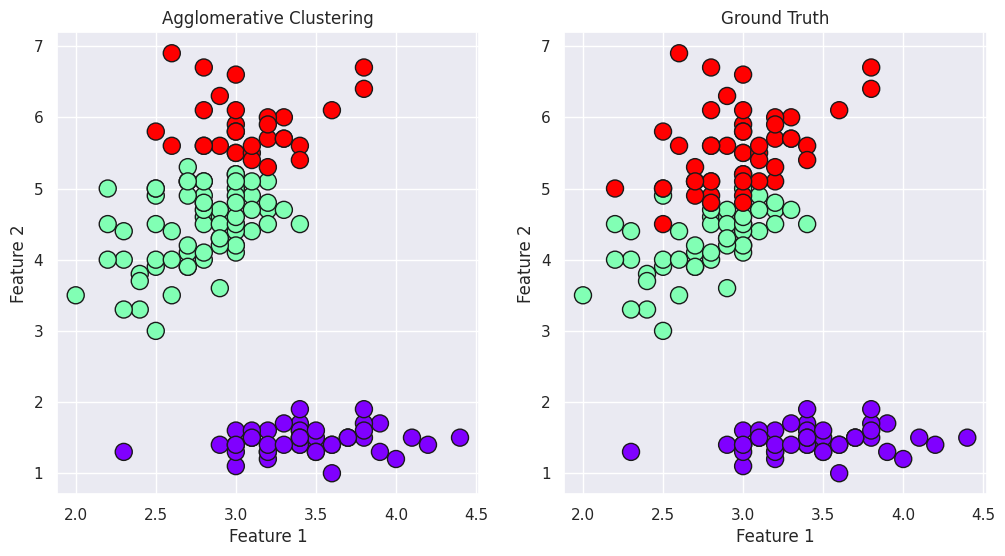

In [ ]:
#Importing required libraries
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
#Getting the data ready
data = load_iris()
df = data.data
#Selecting certain features based on which clustering is done
df = df[:,1:3]
#Creating the model
agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean',
linkage = 'average')
#predicting the labels
labels = agg_clustering.fit_predict(df)
# Print the cluster labels
print("Cluster labels:", labels)
# Print the ground truth
print("Ground truth:", data.target)
# Visualize the clusters
plt.figure(figsize=(12, 6))
# Cluster visualization
plt.subplot(1, 2, 1)
plt.scatter(df[:, 0], df[:, 1], c=labels, cmap='rainbow', edgecolor='k', s=150)
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
# Ground truth visualization
plt.subplot(1, 2, 2)
plt.scatter(df[:, 0], df[:, 1], c=data.target, cmap='rainbow', edgecolor='k', s=150)
plt.title('Ground Truth')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
# it's pretty good!!! some errors in the overlapping bit but really really not bad

#### 2) dendrogram of the iris data based on two features

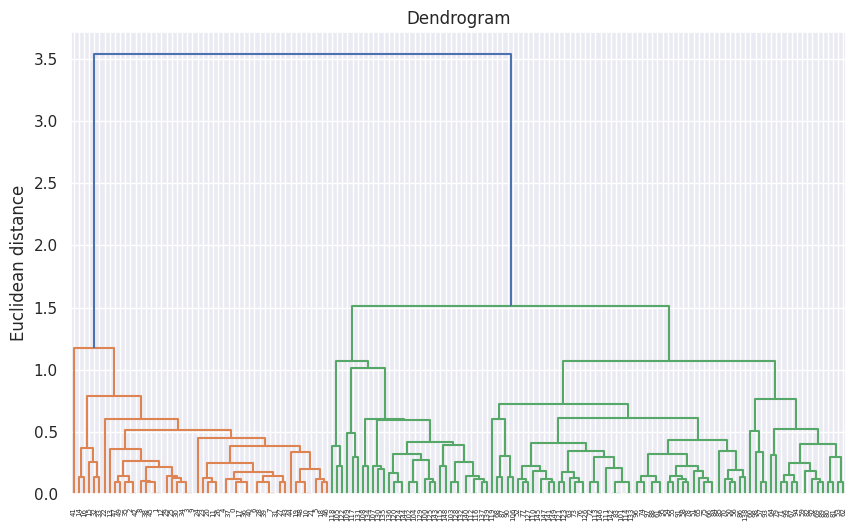

In [ ]:
#Importing libraries
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage
#Getting the data ready
data = load_iris()
df = data.data
#Selecting certain features based on which clustering is done
df = df[:,1:3]
#Linkage Matrix
Z = linkage(df, method = 'average') # tbh kinda lost here, I guess it is maybe explained in lecture?
plt.figure(figsize=(10,6))
#plotting dendrogram
dendro = dendrogram(Z) # again a little lost
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

# kinda doesn't seem that good as it creates two clusters but we actually have three classes?
# but I@m not sure if I@m interpreting correctly

### Task 06. Agglomerative Clusting
(nearly there thank god, this is loooooooong)
#### 1) load the data

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram , linkage
df = pd.read_csv('https://raw.githubusercontent.com/lborohfang/COP528AML_Files/main/student.csv')
print(df.head(10))
student = np.asarray(df.iloc[:,1:])

  Student  R-Programming  Python-Programming  Data Mining  Machine Learning
0      S1             85                  89           76                55
1      S2             67                  88           64                80
2      S3             77                  76           71                69
3      S4             57                  63           57                62
4      S5             44                  60           63                61
5      S6             90                  84           78                83
6      S7             68                  70           80                66
7      S8             62                  50           61                58
8      S9             81                  75           88                82
9     S10             92                  80           71                73


#### 2) use the function in `sklearn` to calculate the pairwise distance table and use agglomerative clustering to cluster students into classes

In [ ]:
# pairwise distance
from sklearn.metrics import DistanceMetric
dist=DistanceMetric.get_metric("euclidean")
print(dist.pairwise(student))

[[ 0.         33.07567082 21.30727575 43.24349662 52.22068556 28.94822965
  28.05352028 47.79121258 32.93933818 21.88606863]
 [33.07567082  0.         20.34698995 33.13608305 40.92676386 27.38612788
  27.87471973 44.29446918 30.7408523  28.05352028]
 [21.30727575 20.34698995  0.         28.53068524 38.37968212 21.86321111
  14.38749457 33.49626845 21.79449472 16.03121954]
 [43.24349662 33.13608305 28.53068524  0.         14.6628783  49.11211663
  26.73948391 15.03329638 45.61797891 42.79018579]
 [52.22068556 40.92676386 38.37968212 14.6628783   0.         58.31809325
  31.46426545 20.90454496 51.57518783 53.96295025]
 [28.94822965 27.38612788 21.86321111 49.11211663 58.31809325  0.
  31.19294792 53.42284156 16.21727474 13.        ]
 [28.05352028 27.87471973 14.38749457 26.73948391 31.46426545 31.19294792
   0.         29.3428015  22.6715681  28.39013913]
 [47.79121258 44.29446918 33.49626845 15.03329638 20.90454496 53.42284156
  29.3428015   0.         47.86439178 46.09772229]
 [32.939

[[85 89 76 55]
 [67 88 64 80]
 [77 76 71 69]
 [57 63 57 62]
 [44 60 63 61]
 [90 84 78 83]
 [68 70 80 66]
 [62 50 61 58]
 [81 75 88 82]
 [92 80 71 73]]
Cluster labels: [0 0 0 1 1 0 0 1 0 0]


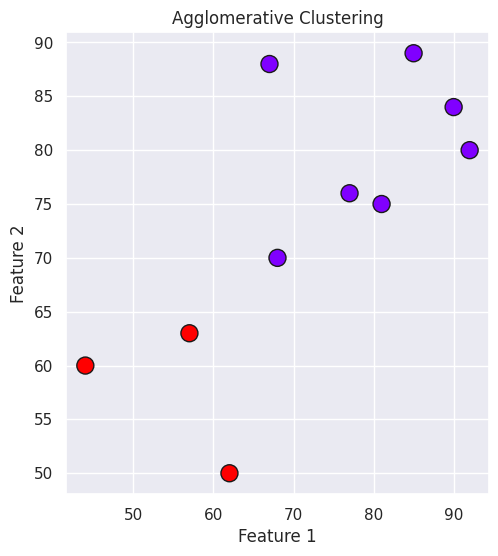

In [ ]:
# agglomerative clustering

#Importing required libraries
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

print(student)

#Creating the model
agg_clustering = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'average')

#predicting the labels
labels = agg_clustering.fit_predict(student)

# Print the cluster labels
print("Cluster labels:", labels)

# Visualize the clusters
plt.figure(figsize=(12, 6))
# Cluster visualization
plt.subplot(1, 2, 1)
plt.scatter(student[:, 0], student[:, 1], c=labels, cmap='rainbow', edgecolor='k', s=150)
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

# this is the plot from the example, but that only plots two features and we have four!


# ok I think a pairwise plot would be nice but not sure I really know how to do that. LEt's try


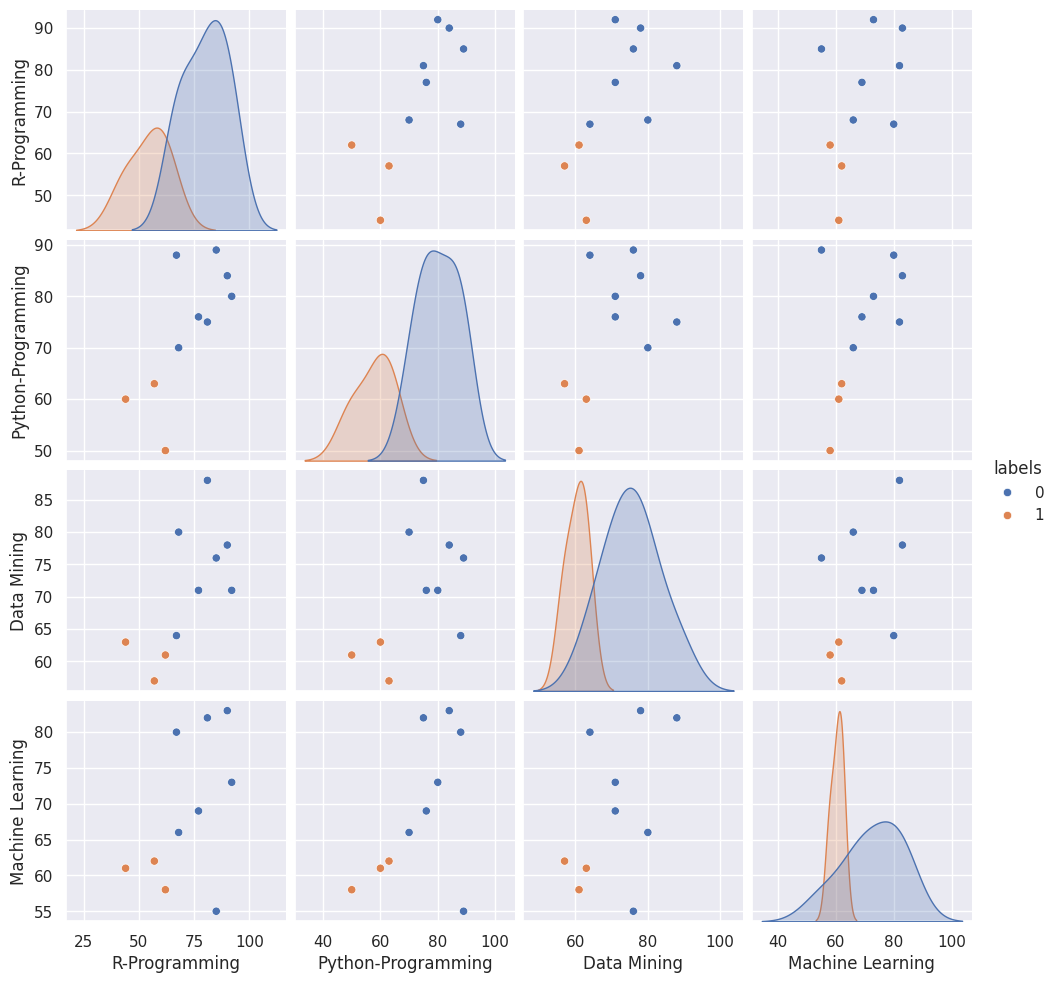

In [ ]:
df_student = pd.DataFrame(data = student, columns = ['R-Programming',  'Python-Programming',  'Data Mining',  'Machine Learning'])
df_student["labels"] = labels
sns.pairplot(df_student, vars=['R-Programming',  'Python-Programming',  'Data Mining',  'Machine Learning'],
hue="labels")

### Tutorial 10. DBSCAN
(finally the last one... zzz....)

Density-Based Spatial Clustering of Applications with Noise
- can find arbitrarily-shaped clusters and those with lots of noise/outliers
- the general idea is that a point belongs to a cluster if it is close to many points also in that cluster
#### 1) generation of datasets for testing DBSCAN

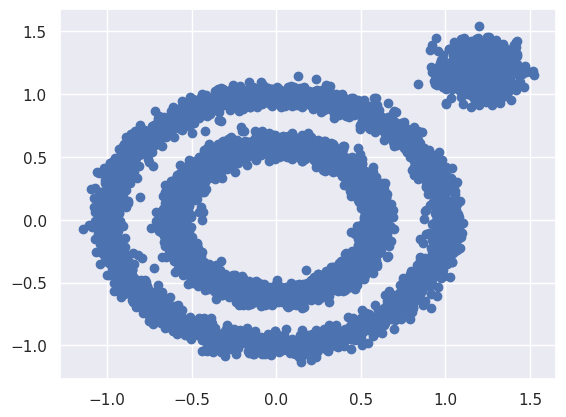

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
X1, y1=datasets.make_circles(n_samples=5000, factor=.6,
noise=.05)
X2, y2 = datasets.make_blobs(n_samples=1000, n_features=2,
centers=[[1.2,1.2]], cluster_std=[[.1]],
random_state=9)
X = np.concatenate((X1, X2))
plt.scatter(X[:, 0], X[:, 1], marker='o')
plt.show()

#### 2) clustering using the `DBSCAN` function in `sklearn`

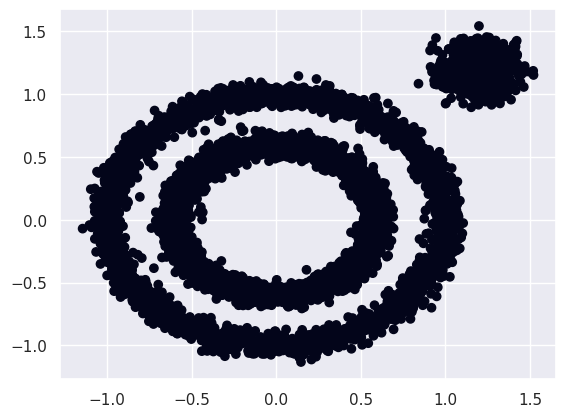

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.cluster import DBSCAN
y_pred = DBSCAN().fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show()

# hmmmmmm, either this hasn't done what it's supposed to visually, or it's put all the data in the same cluster
# lets check
print(y_pred)
# yep seems like it's all in the same cluster

#### 3) tweaking the parameters and re-clustering

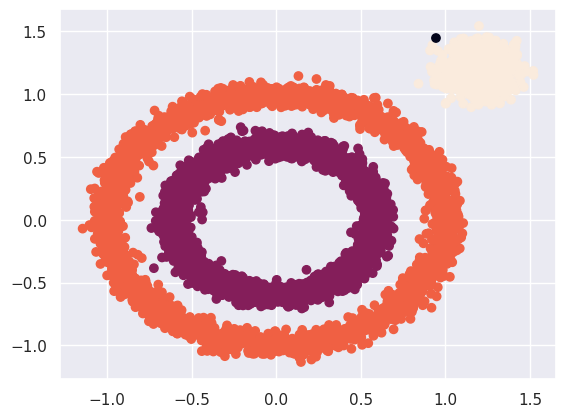

In [ ]:
y_pred = DBSCAN(eps = 0.1, min_samples = 10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.show() # ta da